In [1]:
#importando as dependencias necessarias
import pandas as pd
import json, csv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import itertools
import time, datetime, os
import sklearn
from sklearn import preprocessing, model_selection
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import dataframe_image as dfi

In [2]:
#formatando o arquivo bin como csv (para criacao do dataframe)
with open('loggers/satu.bin', 'r') as file:
    f = csv.reader(file)
    header = next(f)
    newHeader = [i.strip() for i in header[0:-1]]
    idSmart = header[-1][11:]
    print(newHeader, idSmart)

    with open('data/satu.csv', 'w') as file:
        w = csv.writer(file)
        w.writerow(newHeader)
        for row in f:
            w.writerow(row)

['dateTime', 'battery', 'fileSize', 'sleepiness', 'pressure', 'lux', 'heartRate', 'ppgGreen', 'ppgRed', 'ppgIR', 'saturation', 'accelerometerZ', 'accelerometerX', 'accelerometerY', 'gyroscopeZ', 'gyroscopeX', 'gyroscopeY'] 7ab504da804297cb


In [3]:
#carregando o dataframe a partir do arquivo csv
df = pd.read_csv('data/satu.csv')
df.head()

,dateTime,battery,fileSize,sleepiness,pressure,lux,heartRate,ppgGreen,ppgRed,ppgIR,saturation,accelerometerZ,accelerometerX,accelerometerY,gyroscopeZ,gyroscopeX,gyroscopeY
0,NaN,100.0,0.000205,0,921.38620,4.0,0.0,0.0,6278743.0,6649681.0,NaN,-3.129222,2.856283,8.621520,0.298102,0.041539,-0.439823
1,2022-03-28T22:46:31-03:00,100.0,0.000333,0,921.37450,0.0,0.0,2115139.0,6290679.0,6554062.0,84.89149,-2.348712,3.306392,8.449138,0.053756,-0.085521,-0.109956
2,2022-03-28T22:46:32-03:00,100.0,0.000492,0,921.35425,0.0,0.0,2285827.0,6339629.0,6544423.0,85.00039,-2.477999,3.186682,9.042900,0.017104,-0.042761,0.001222
3,2022-03-28T22:46:33-03:00,100.0,0.000654,0,921.38430,0.0,0.0,2495719.0,6369232.0,6556569.0,84.99994,-2.348712,3.409343,8.980651,-0.014661,0.039095,-0.034208
4,2022-03-28T22:46:34-03:00,100.0,0.000815,0,921.36890,0.0,0.0,2589617.0,6366988.0,6550969.0,84.99997,-2.236184,1.338359,9.270349,-0.047647,0.028100,-0.003665


In [4]:
#convertendo datetime para valor numerico
if(df.dateTime.isnull()[0]):
    df = df.iloc[1: , :]
    df = df.reset_index()
time = []
df.head() 
y, mo, d = map(int, str(df['dateTime'][0])[0:10].split('-'))
h,m,s = map(int, str(df['dateTime'][0])[11:19].split(':'))
startingTime = datetime.datetime(y, mo, d, h, m, s).timestamp()

for val in range(len(df.dateTime)):
    v = str(df.dateTime[val])
    y, mo, d = map(int, v[0:10].split('-'))
    h,m,s = map(int, v[11:19].split(':'))
    ts = datetime.datetime(y, mo, d, h, m, s).timestamp()
    ts = ts - startingTime
    time.append(ts)
    
df.drop('dateTime', axis = 1, inplace=True)
df['dateTime'] = time
df.head()

,index,battery,fileSize,sleepiness,pressure,lux,heartRate,ppgGreen,ppgRed,ppgIR,saturation,accelerometerZ,accelerometerX,accelerometerY,gyroscopeZ,gyroscopeX,gyroscopeY,dateTime
0,1,100.0,0.000333,0,921.37450,0.0,0.0,2115139.0,6290679.0,6554062.0,84.89149,-2.348712,3.306392,8.449138,0.053756,-0.085521,-0.109956,0.0
1,2,100.0,0.000492,0,921.35425,0.0,0.0,2285827.0,6339629.0,6544423.0,85.00039,-2.477999,3.186682,9.042900,0.017104,-0.042761,0.001222,1.0
2,3,100.0,0.000654,0,921.38430,0.0,0.0,2495719.0,6369232.0,6556569.0,84.99994,-2.348712,3.409343,8.980651,-0.014661,0.039095,-0.034208,2.0
3,4,100.0,0.000815,0,921.36890,0.0,0.0,2589617.0,6366988.0,6550969.0,84.99997,-2.236184,1.338359,9.270349,-0.047647,0.028100,-0.003665,3.0
4,5,100.0,0.000979,0,921.35720,36.0,0.0,2438508.0,6397196.0,6559814.0,84.99999,-4.800375,-5.796362,5.789180,0.477697,-0.306654,-0.195477,6.0


In [5]:
#data = df[["dateTime", "heartRate", "ppgGreen", "ppgRed", "ppgIR", "saturation","sleepiness"]]
data = df[["dateTime", "heartRate", "ppgGreen", "ppgRed", "ppgIR", "saturation","sleepiness", "pressure", "accelerometerX", "accelerometerY", "accelerometerZ", "gyroscopeX", "gyroscopeY", "gyroscopeZ"]]
data.head()

,dateTime,heartRate,ppgGreen,ppgRed,ppgIR,saturation,sleepiness,pressure,accelerometerX,accelerometerY,accelerometerZ,gyroscopeX,gyroscopeY,gyroscopeZ
0,0.0,0.0,2115139.0,6290679.0,6554062.0,84.89149,0,921.37450,3.306392,8.449138,-2.348712,-0.085521,-0.109956,0.053756
1,1.0,0.0,2285827.0,6339629.0,6544423.0,85.00039,0,921.35425,3.186682,9.042900,-2.477999,-0.042761,0.001222,0.017104
2,2.0,0.0,2495719.0,6369232.0,6556569.0,84.99994,0,921.38430,3.409343,8.980651,-2.348712,0.039095,-0.034208,-0.014661
3,3.0,0.0,2589617.0,6366988.0,6550969.0,84.99997,0,921.36890,1.338359,9.270349,-2.236184,0.028100,-0.003665,-0.047647
4,6.0,0.0,2438508.0,6397196.0,6559814.0,84.99999,0,921.35720,-5.796362,5.789180,-4.800375,-0.306654,-0.195477,0.477697


C:\Users\lapto\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


dateTime           0
heartRate         42
ppgGreen           0
ppgRed             0
ppgIR              0
saturation         0
sleepiness         0
pressure           0
accelerometerX     0
accelerometerY     0
accelerometerZ     0
gyroscopeX         0
gyroscopeY         0
gyroscopeZ         0
dtype: int64

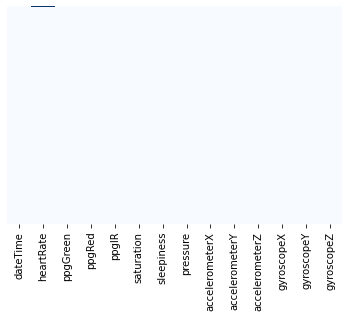

In [6]:
#verificando se existem dados faltando
data.ppgGreen.replace(0, np.nan, inplace=True)
data.ppgRed.replace(0, np.nan, inplace=True)
data.heartRate.replace(0, np.nan, inplace=True)
data.ppgIR.replace(0, np.nan, inplace=True)
data.saturation.replace(0, np.nan, inplace=True)
hm = sns.heatmap(data.isnull(),cbar=False,yticklabels=False,cmap = 'Blues')
data.isna().sum()

In [7]:
#substituindo os valores faltantes pela media da coluna (caso nao existam nao e necessario executar essa celula)
#obs: apenas valido para valores numericos
num_col = ['heartRate', 'ppgGreen', "saturation"] # lista com as colunas que possuem valores faltantes
for col in num_col:
    data[col]=pd.to_numeric(data[col])
    data[col].fillna(data[col].mean(), inplace=True)
data.isna().sum()

C:\Users\lapto\AppData\Local\Temp\ipykernel_1396\416091374.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col]=pd.to_numeric(data[col])
C:\Users\lapto\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


dateTime          0
heartRate         0
ppgGreen          0
ppgRed            0
ppgIR             0
saturation        0
sleepiness        0
pressure          0
accelerometerX    0
accelerometerY    0
accelerometerZ    0
gyroscopeX        0
gyroscopeY        0
gyroscopeZ        0
dtype: int64

In [8]:
#adicionando as classes referentes ao grafico de sono do relogio
#valores devem ser modificados de acordo com o logger
sleep = []

for val in range(len(df.dateTime)):
    v = int(data.dateTime[val])
    
    if (v <= 4398):
        sleep.append(data.sleepiness[val])
    elif (4398 < v and v <= 5289):
        sleep.append(3)
    elif (5289 < v and v <= 7898):
        sleep.append(5)
    elif (7898 < v and v <= 8889):
        sleep.append(4)
    elif (8889 < v and v <= 12489):
        sleep.append(3)
    elif (12489 < v and v <= 13089):
        sleep.append(4)
    elif (13089 < v and v <= 13989):
        sleep.append(3)
    else:
        sleep.append(5)
        
data.drop('sleepiness', axis = 1, inplace=True)
data['sleepiness'] = sleep
data.head()

C:\Users\lapto\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\lapto\AppData\Local\Temp\ipykernel_1396\2572931609.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sleepiness'] = sleep


,dateTime,heartRate,ppgGreen,ppgRed,ppgIR,saturation,pressure,accelerometerX,accelerometerY,accelerometerZ,gyroscopeX,gyroscopeY,gyroscopeZ,sleepiness
0,0.0,69.395456,2115139.0,6290679.0,6554062.0,84.89149,921.37450,3.306392,8.449138,-2.348712,-0.085521,-0.109956,0.053756,0
1,1.0,69.395456,2285827.0,6339629.0,6544423.0,85.00039,921.35425,3.186682,9.042900,-2.477999,-0.042761,0.001222,0.017104,0
2,2.0,69.395456,2495719.0,6369232.0,6556569.0,84.99994,921.38430,3.409343,8.980651,-2.348712,0.039095,-0.034208,-0.014661,0
3,3.0,69.395456,2589617.0,6366988.0,6550969.0,84.99997,921.36890,1.338359,9.270349,-2.236184,0.028100,-0.003665,-0.047647,0
4,6.0,69.395456,2438508.0,6397196.0,6559814.0,84.99999,921.35720,-5.796362,5.789180,-4.800375,-0.306654,-0.195477,0.477697,0


In [9]:
#teste de predicao por knn sem pre-processamento dos dados

le = preprocessing.LabelEncoder()
label = "sleepiness"

x = np.array(data.drop([label], 1))
y = np.array(data[label])
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.15)

model = KNeighborsClassifier(n_neighbors = 3)
model.fit(x_train, y_train)

acc = model.score(x_test, y_test)
predicted = model.predict(x_test)

with open("predicoes/knn.txt", "w") as outFile:

    for i in range(len(predicted)):
        outFile.write(f"Predito: {predicted[i]} - Dados: {x_test[i]} - Real: {y_test[i]}\n")
        
    outFile.write(f"\nProcesso finalizado com acurácia de {float(acc)*100}%")
    
print(float(acc)*100)

C:\Users\lapto\AppData\Local\Temp\ipykernel_1396\4257066356.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = np.array(data.drop([label], 1))


91.95020746887967


In [10]:
#calculando o numero de outliers
def outlierCount(df, var):
    q1= df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    iqRange = q3 - q1
    maxVal = q3 + 1.5 * iqRange
    minVal = q1 - 1.5 * iqRange
    count = len(df[(df[var] < minVal)]) + len(df[(df[var] > maxVal)])
    return count, minVal, maxVal

for col in df.columns:
    a, b, c = outlierCount(df, col)
    print(f'{col}: {a}')

index: 0
battery: 0
fileSize: 0
sleepiness: 0
pressure: 0
lux: 1221
heartRate: 1021
ppgGreen: 5
ppgRed: 107
ppgIR: 115
saturation: 3140
accelerometerZ: 10
accelerometerX: 4828
accelerometerY: 0
gyroscopeZ: 2916
gyroscopeX: 2765
gyroscopeY: 2789
dateTime: 0


In [11]:
#funcao para remover instancias contendo outliers
def removeOutliers(df, *args):
    newDf = df.copy()
    for var in args:
        count, minVal, maxVal = outlierCount(df, var)
        newDf = newDf[(newDf[var] > minVal) & (newDf[var] < maxVal)]
    return newDf
    
noOutliers = removeOutliers(data, 'ppgGreen', 'ppgRed', 'ppgIR', 'heartRate')
print(outlierCount(noOutliers, 'heartRate'))
print(outlierCount(data, 'heartRate'))

(174, 48.5, 84.5)
(979, 47.0, 87.0)


In [12]:
#funcao de normalizacao por maximum absolute scaling
def maxAbsoluteScale(df):
    scaledDf = df.copy()
    #Divide cada valor de uma coluna pelo valor maximo da mesma
    for column in scaledDf.columns:
        #as colunas de horario, tamanho de arquivo e bateria sao desconsideradas
        if column != 'dateTime' and column != 'size' and column != 'battery' and column != 'sleepiness':
            scaledDf[column] = scaledDf[column]  / scaledDf[column].abs().max()
    #retorna os valores em uma escala de -1 a 1
    return scaledDf

In [13]:
#funcao de normalizacao por min-max
def minMaxScale(df):
    scaledDf = df.copy()
    #aplicando a formula do min-max (x-min / range)
    for column in scaledDf.columns:
        #as colunas de horario, tamanho de arquivo e bateria sao desconsideradas
        if column != 'dateTime' and column != 'size' and column != 'battery' and column != 'sleepiness':
            scaledDf[column] = (scaledDf[column] - scaledDf[column].min()) / (scaledDf[column].max() - scaledDf[column].min())
    #retorna os valores em uma escala entre 0 e 1
    return scaledDf

In [14]:
#funcao de normalizacao por z-score (standardize)
def standardize(df):
    scaledDf = df.copy()
    #aplicando a formula do z-score (x-media / desvio padrao)
    for column in scaledDf.columns:
        #as colunas de horario, tamanho de arquivo e bateria sao desconsideradas
        if column != 'dateTime' and column != 'size' and column != 'battery' and column != 'sleepiness':
            scaledDf[column] = (scaledDf[column] - scaledDf[column].mean()) / scaledDf[column].std()
    #retorna os valores com media = 0 e desvio padrao = 1
    return scaledDf

In [15]:
#funcao de normalizacao por robust scaling (ideal para dados com muitos outliers)
def robustScaling(df):
    scaledDf = df.copy()
    #aplicando a formula do robust scaling (x-mediana/(q3-q2)*) *interquartille range
    for column in scaledDf.columns:
        #as colunas de horario, tamanho de arquivo e bateria sao desconsideradas
        if column != 'dateTime' and column != 'size' and column != 'battery'  and column != 'sleepiness':
            scaledDf[column] = (scaledDf[column] - scaledDf[column].median())  / (scaledDf[column].quantile(0.75) - scaledDf[column].quantile(0.25))
    return scaledDf

In [16]:
#criando dataframes com dados normalizados (todas variaveis)
maxAbsDf = maxAbsoluteScale(data)
minMaxDf = minMaxScale(data)
zScoreDf = standardize(data)
robustDf = robustScaling(data)
#criando dataframes com dados normalizados (todas variaveis) e sem outliers
NOmaxAbsDf = maxAbsoluteScale(data)
NOminMaxDf = minMaxScale(data)
NOzScoreDf = standardize(data)
NOrobustDf = robustScaling(data)

dataFrames = [maxAbsDf, minMaxDf, zScoreDf, robustDf, NOmaxAbsDf, NOminMaxDf, NOzScoreDf, NOrobustDf]

In [17]:
#teste de predicao por knn com dados pre processados
le = preprocessing.LabelEncoder()
label = "sleepiness"

for frame in dataFrames:
    
    x = np.array(frame.drop([label], 1))
    y = np.array(frame[label])
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.15)

    model = KNeighborsClassifier(n_neighbors = 3)
    model.fit(x_train, y_train)

    acc = model.score(x_test, y_test)
    predicted = model.predict(x_test)

    print(float(acc)*100)

C:\Users\lapto\AppData\Local\Temp\ipykernel_1396\555418926.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = np.array(frame.drop([label], 1))


99.91701244813278


C:\Users\lapto\AppData\Local\Temp\ipykernel_1396\555418926.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = np.array(frame.drop([label], 1))


99.95850622406638


C:\Users\lapto\AppData\Local\Temp\ipykernel_1396\555418926.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = np.array(frame.drop([label], 1))


100.0


C:\Users\lapto\AppData\Local\Temp\ipykernel_1396\555418926.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = np.array(frame.drop([label], 1))


99.66804979253112


C:\Users\lapto\AppData\Local\Temp\ipykernel_1396\555418926.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = np.array(frame.drop([label], 1))


99.95850622406638


C:\Users\lapto\AppData\Local\Temp\ipykernel_1396\555418926.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = np.array(frame.drop([label], 1))


99.95850622406638


C:\Users\lapto\AppData\Local\Temp\ipykernel_1396\555418926.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = np.array(frame.drop([label], 1))


99.91701244813278


C:\Users\lapto\AppData\Local\Temp\ipykernel_1396\555418926.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = np.array(frame.drop([label], 1))


99.6265560165975
